<h5>This notebook solves problem 1.50 in <i> Classical Mechanics </i> by Taylor (edition 5) for a skateboard in a halfpipe (simple pendulum).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import *
import numpy as np
from IPython.display import Image
from scipy.integrate import odeint, ode

The equation of motion for a simple pendulum is:

${\ddot \phi} = - \frac{g}{R} \sin \phi $

Let 
$x = 
\begin{bmatrix}
\phi \\
\dot \phi
\end{bmatrix}
=
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
$

then 
$\dot x = 
\begin{bmatrix}
\dot\phi \\
\ddot \phi
\end{bmatrix}
=
\begin{bmatrix}
\dot\phi \\
- \frac{g}{R}\sin \phi 
\end{bmatrix}
=
\begin{bmatrix}
x_2 \\
- \frac{g}{R}\sin x_1
\end{bmatrix}
$

In [2]:
# set constants and define differentials

g = 9.82  # m/s^2
R = 5     # m 

def dx(x, t):
    """
    The right-hand side of the pendulum ODE
    """
    x1, x2 = x[0], x[1]
    
    dx1 = x[1]
    dx2 = -g/R*sin(x[0])
    
    return [dx1, dx2]

In [3]:
# [initial angle, initial angular velocity]
phi_0 = 20./180*pi

x0 = [phi_0, 0] 

In [4]:
# time coodinate to solve the ODE for: from 0 to 10 seconds
start_time = 0
stop_time = 10
total_time_steps = stop_time*100

t = linspace(start_time, stop_time, total_time_steps)

In [5]:
# solve the ODE 

x = odeint(dx, x0, t)

In [6]:
# x = [phi(t)   dphi(t)/dt]

x.shape 

(1000, 2)

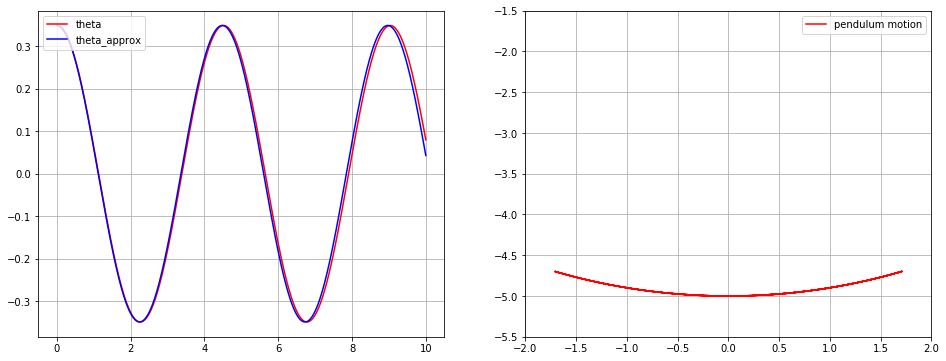

In [7]:
# plot the angles as a function of time

fig, axes = plt.subplots(1,2, figsize=(16,6))
axes[0].plot(t, x[:, 0], 'r', label="theta")
axes[0].plot(t, x0[0]*cos(sqrt(g/R)*t), 'b', label="theta_approx")
axes[0].legend(loc=2)
axes[0].grid()


x1 = + R * sin(x[:, 0])
y1 = - R * cos(x[:, 0])
axes[1].plot(x1, y1, 'r', label="pendulum motion")
axes[1].legend()
axes[1].set_ylim([-5.5, -1.5])
axes[1].set_xlim([-2, 2])
axes[1].grid()

In [8]:
# find how long it takes for pendulum to come back to initial position (question from example 1.2)

tol = phi_0/10**4
x_init_mask = x[:,0] > phi_0 - tol
print("x value: ",x[x_init_mask,0][1]/pi*180, '\t degrees')
idt = t[x_init_mask]
print("t value: ",idt[2], '\t seconds elapsed from t=0')

x value:  19.998071825875996 	 degrees
t value:  4.514514514514515 	 seconds elapsed from t=0


## Animation Start

- need to get out of matplotlib inline

In [9]:
# animation does not work inline
%matplotlib
import matplotlib.animation as animation

Using matplotlib backend: MacOSX


In [10]:
def animation_frame(tt):
    x1tmp = + R * sin(x[tt, 0])
    y1tmp = - R * cos(x[tt, 0])
    line.set_xdata([0,x1tmp])
    line.set_ydata([0,y1tmp])
    time_text.set_text(time_template % (tt/1000*stop_time))
    return line,time_text

In [11]:
# animation of pendulum
interval_val = stop_time/total_time_steps*1000

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(-5,5)
ax.set_ylim(-5.5,5)
ax.plot(x1, y1,marker='.',color='red')
ax.set_title('Simple pendulum animation for %s seconds' % stop_time)



line, = ax.plot([], [], marker='o',linewidth=1,markersize=10)
time_template = 'time = %.1fs'
time_text = ax.text(0.5, 0.6, '', transform=ax.transAxes)

a = animation.FuncAnimation(fig, func=animation_frame, 
                          frames=arange(start_time,total_time_steps),
                            interval=3.3, blit=False, repeat=False)

plt.show()